In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
#General visualization settings
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)

In [3]:
#Path settings
#Previous Iterations
#root_path = Path(r"C:\Users\neurogears\OneDrive - NeuroGEARS Ltd\CricketPrelemdata\ArmBenchmarking")
#session_id = "05_16_2022_10_32_05"
#session_id = "05_16_2022_11_38_55"

root_path = Path(r"D:\CricketVR\ArmBenchmarking")
session_id = "05_31_2022_09_02_01"

session_path = root_path / session_id


#### SWC-HARP and CF-HARP timing benchmarking

[0.31999999 0.38400001 0.38400001 0.32000005 0.57600002 0.41600002
 0.32000005 0.31999999 0.28799998 0.28800004 0.41600002 0.32000005
 0.28799998 0.41599997 0.352      0.31999999 0.31999999 0.28800004
 0.57600002 0.32000005 0.31999999 0.28799998 0.44800004 0.57600002
 0.352      0.352      0.31999999 0.32000005 0.28799998 0.28799998
 0.60800003 0.28800004][ms]
Mean±std  :  0.37 [ms] ± 0.09


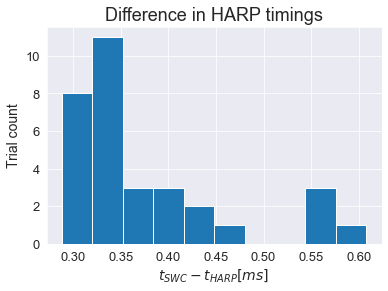

In [4]:
## Compare SWC-HARP and CF-HARP timestamping

#Load data from SWC-HARP
#Note: ARM gpio event is triggered on a falling edge
arm_falling_edge = pd.read_csv(session_path / "ArmFallingEdgeDetection.csv")
arm_falling_edge = arm_falling_edge["ToString()"].values

#Load data from CF-HARP
#Note: there is a bug wherein i am using the rising edge of a very short pulse.
#Should fix in the future!
harp_io = pd.read_csv(session_path / "BehaviorSynchPulse.csv")
harp_falling_edge = harp_io.loc[harp_io["Address"]==35, "ParsedMessage.Seconds"].values

#Calculate the timing difference
deltaTS = - harp_falling_edge + arm_falling_edge

#Plot the distribution of the differences
plt.figure()
plt.hist(deltaTS*1000)
plt.xlabel("$ t_{SWC} - t_{HARP}[ms]$")
plt.ylabel("Trial count")
plt.title("Difference in HARP timings")
print(str(deltaTS*1000) + "[ms]")
print("Mean±std  :  {0:.2f} [ms] ± {1:.2f}".format(np.mean(deltaTS*1000), np.std(deltaTS*1000)))

#Think about offset as a calibration delta
#jitter, where does it come from?

[0.011264 0.01024  0.01008  0.009408 0.009632 0.011072 0.01072  0.009536
 0.01088  0.010976 0.010208 0.010336 0.011008 0.010112 0.009984 0.010112
 0.010048 0.010688 0.009632 0.011072 0.010016 0.009632 0.01216  0.0096
 0.010144 0.0104   0.01088  0.010656 0.010336 0.009376 0.009632 0.011168]
Mean±std  :  10.34 [ms] ± 0.64


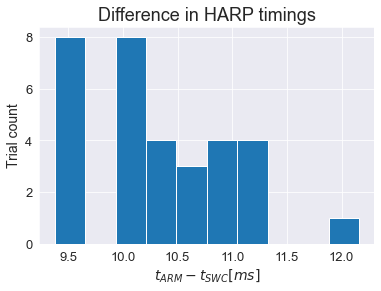

In [5]:
#Load arm instruction timestamp
arm_instructions = pd.read_csv(session_path / "ArmCoords.csv") #ArmCommands
arm_instructions_ts = arm_instructions["Item1.Seconds"].values

#Calculate the timing difference
deltaTS = arm_instructions_ts - arm_falling_edge

#Plot the distribution of the differences
plt.figure()
plt.hist(deltaTS*1000)
plt.xlabel("$t_{ARM} - t_{SWC} [ms]$")
plt.ylabel("Trial count")
plt.title("Difference in HARP timings")
print(deltaTS)
print("Mean±std  :  {0:.2f} [ms] ± {1:.2f}".format(np.mean(deltaTS*1000), np.std(deltaTS*1000)))

# the latencies differences could potentially be explained due to differences in the USB drivers.
# FTDI (HARP) latencies are expected to be around 1ms.
# Generic drivers can take 5-10ms. As a result, the 1-2ms for processing it does make sense.


[0.011008 0.014016 0.014016 0.014016 0.014016 0.015008 0.015008 0.014016
 0.015008 0.015008 0.013984 0.014976 0.015008 0.014016 0.014016 0.013984
 0.014016 0.015008 0.013984 0.014976 0.014016 0.014016 0.012992 0.014016
 0.013984 0.013984 0.013984 0.014016 0.015008 0.013984 0.013984 0.015008]
Mean±std  :  14.02 [ms] ± 0.77


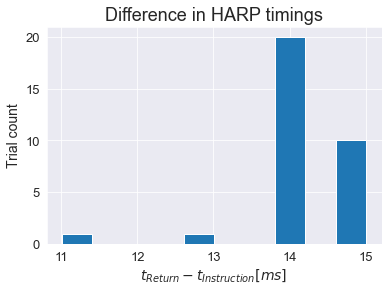

In [6]:
#Calculate the delta with the latest harp timestamp between sending a command and receiving the corresponding event
arm_instructions_latest_ts = arm_instructions["Item2"].values #timestamp of the command return
#timestamp of the event?
arm_commands_latest_ts = pd.read_csv(session_path / "ArmCoords_input.csv")["Seconds"].values #timestamp of the command message

#Calculate the timing difference
deltaTS = arm_instructions_latest_ts - arm_commands_latest_ts #Should be positive

#Plot the distribution of the differences
plt.figure()
plt.hist(deltaTS*1000)
plt.xlabel("$t_{Return} - t_{Instruction} [ms]$")
plt.ylabel("Trial count")
plt.title("Difference in HARP timings")
print(deltaTS)
print("Mean±std  :  {0:.2f} [ms] ± {1:.2f}".format(np.median(deltaTS*1000), np.std(deltaTS*1000)))


#2ms of processing + 10/2 on each side of the trip

In [134]:
#for a,b in zip(arm_events_latest_ts, arm_instructions_latest_ts):
#    print(str(a) + "   " + str(b) + "   " + str(b-a) )


for a,b in zip(np.diff(arm_events_latest_ts), np.diff(arm_instructions_latest_ts)):
    print(str(a) + "   " + str(b) + "   " + str(b-a) )

10.000999927520752   9.996989727020264   -0.004010200500488281
10.007999897003174   10.007999897003174   0.0
10.008990287780762   10.008000373840332   -0.0009899139404296875
10.00901985168457   9.787999629974365   -0.22102022171020508
10.00098991394043   10.222010135650635   0.22102022171020508
10.009990215301514   10.009990215301514   0.0
10.00901985168457   10.010009765625   0.0009899139404296875
10.008990287780762   10.007999897003174   -0.0009903907775878906
10.008999824523926   10.009000301361084   4.76837158203125e-07
10.007999897003174   10.008989810943604   0.0009899139404296875
10.010010242462158   10.009020328521729   -0.0009899139404296875
10.007999897003174   10.007999897003174   0.0
10.008989810943604   10.008989810943604   0.0
10.009000301361084   10.008999824523926   -4.76837158203125e-07
10.008989810943604   10.008990287780762   4.76837158203125e-07
10.007999897003174   10.00901985168457   0.0010199546813964844
10.002010345458984   10.00199031829834   -2.002716064453125

#### Benchmarking real arm movement vs SWC-HARP instruction
- Get a movement metric (trajectory or overall movie energy)
- Get the timestamp of the instruction (for now assume everything is well align which will result in a ~1second lag)
- Get the closest frames using the PWM timestamps

In [7]:


# Load instructions
arm_instructions = pd.read_csv(session_path / "ArmCoords.csv")
arm_instructions.columns = ['Time', 'Magnitude', 'Angle']

# Load PWM timestamps
pwm_events = pd.read_csv(session_path / "CameraCentroid.csv")

# Load movie energy data
movie_energy = pwm_events["MovieEnergy"].values

print(pwm_events.columns)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

0 frames were lost!
Index(['TrackingData.CricketLed.Item1.X', 'TrackingData.CricketLed.Item1.Y',
       'TrackingData.CricketLed.Item2', 'TrackingData.JointLed.Item1.X',
       'TrackingData.JointLed.Item1.Y', 'TrackingData.JointLed.Item2',
       'MovieEnergy', 'HarpPWMTimeStamp', 'FrameID', 'FrameTimestamp'],
      dtype='object')


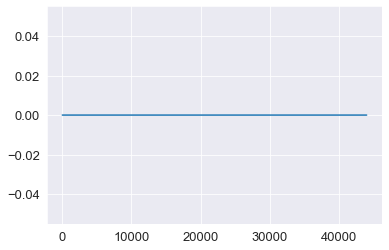

In [63]:
#Sanity check for dropped frames
lost_frames = np.diff(pwm_events["FrameID"].values) - 1
print("{0} frames were lost!".format(np.sum(lost_frames)))
print(pwm_events.columns)
plt.figure()
plt.plot(lost_frames)


In [8]:
arm_instructions["TrialFrame"] = ""
timeoffset = 0
for index, row in arm_instructions.iterrows():
    #find the frame right after the instruction timestamp
    instruction_timestamp = row["Time"] + timeoffset #time of the current instruction (SWC-HARP time)
    closest_frame_ts = pwm_events["HarpPWMTimeStamp"] - instruction_timestamp
    closest_frame_ts[closest_frame_ts < 0 ] = np.nan
    closest_frame_idx = (np.abs(closest_frame_ts)).argmin()
    if closest_frame_idx < 0:
        print('No data for trial ' + str(index))
        arm_instructions.loc[index, "TrialFrame"] = np.nan

    else:
        arm_instructions.loc[index, "TrialFrame"] = closest_frame_idx


# collect trial aligned data
#simplify and use fs for now...
fs = 1.0/np.mean(np.diff(pwm_events["HarpPWMTimeStamp"]))
#fs = 200

win = (-2, 2) # seconds around instruction timestamp
win_frames = np.int32(np.array(win) * fs) # seconds -> frames
ts = np.linspace(win[0], win[1], win_frames[1] - win_frames[0]) # time axis for the window
baseline_win = (-2, -0.1) # temporal window to baseline the data with

arm_instructions["TrialFrameWin_start"] = arm_instructions["TrialFrame"].values + win_frames[0]
arm_instructions["TrialFrameWin_end"] = arm_instructions["TrialFrame"].values + win_frames[1]

emptyArray = np.empty([win_frames[1] - win_frames[0],])
emptyArray[:] = np.NaN
arm_instructions["AlignedMovieEnergy"] = arm_instructions.apply(lambda x: emptyArray.copy(), axis = 1)

arm_instructions["HasData"] = False


for index, row in arm_instructions.iterrows():
    if ((row["TrialFrameWin_start"] < 0) or (row["TrialFrameWin_end"]  >  pwm_events.shape[0]) or (row["TrialFrame"] is np.nan)):
        print('Invalid data for trial ' + str(index))
    else:
        arm_instructions["HasData"] = True
        _movie_energy = movie_energy[row["TrialFrameWin_start"]:row["TrialFrameWin_end"]]
        _bl_frames = (ts >= baseline_win[0]) & (ts <= baseline_win[1])
        _bl = np.nanmedian(_movie_energy[_bl_frames])
        arm_instructions.loc[index,"AlignedMovieEnergy"][:] = _movie_energy - _bl




KeyError: 'Time'

In [97]:
arm_instructions["TrialFrame"]

0       229
1      2228
2      4230
3      6232
4      8232
5     10234
6     12236
7     14239
8     16239
9     18241
10    20243
11    22244
12    24246
13    26248
14    28250
15    30250
16    32252
17    34253
18    36255
19    38257
20    40257
21    42259
Name: TrialFrame, dtype: object

In [9]:
import matplotlib.ticker
plt.figure(figsize=(10,4))
for index, row in arm_instructions.iterrows():
        if row["HasData"]:
                plt.plot(ts, row["AlignedMovieEnergy"], lw = 2)

avg = np.nanmedian(np.vstack([row['AlignedMovieEnergy'] for index, row  in arm_instructions.iterrows()]), axis=0)
plt.plot(ts, avg, c = "black", lw = 4)
plt.xlabel("Time[s]")
plt.ylabel("Energy (a.u)")
plt.ylim((-.001, 0.008))
plt.xlim((-0.4, 1))

plt.show()



KeyError: 'HasData'

<Figure size 720x288 with 0 Axes>

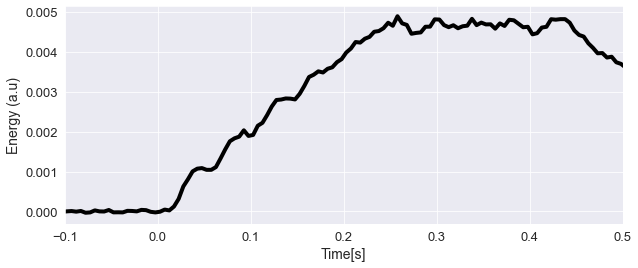

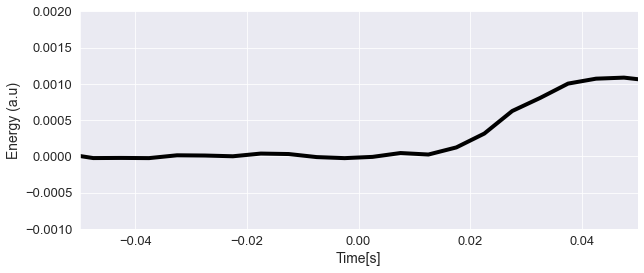

In [111]:

plt.figure(figsize=(10,4))

avg = np.nanmedian(np.vstack([row['AlignedMovieEnergy'] for index, row  in arm_instructions.iterrows()]), axis=0)
plt.plot(ts, avg, c = "black", lw = 4)
plt.xlabel("Time[s]")
plt.ylabel("Energy (a.u)")
plt.xlim((-0.1,0.5))
plt.show()

plt.figure(figsize=(10,4))

avg = np.nanmedian(np.vstack([row['AlignedMovieEnergy'] for index, row  in arm_instructions.iterrows()]), axis=0)
plt.plot(ts, avg, c = "black", lw = 4)
plt.xlabel("Time[s]")
plt.ylabel("Energy (a.u)")
plt.xlim((-0.05,0.05))
plt.ylim((-0.001, 0.002))
plt.show()


In [114]:
x,y = pwm_events["TrackingData.CricketLed.Item1.X"].values, pwm_events["TrackingData.CricketLed.Item1.Y"].values
x_d, y_d = np.diff(x), np.diff(y)
v = np.sqrt(x_d**2 + y_d ** 2)


(44036,)
